In [3]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gymnasium as gym
from source.algorithms import FarmAgentSarsaVFA, FarmAgentMCVFA
import source.config as config
import source.farm_env # Import necessary to register the gym environment

In [3]:
MC_weights = np.load('data/MCVFA/MC_weights.npy')
# MC_weights = torch.tensor(MC_weights, requires_grad=True)

In [ ]:
# MC_vfa_agent.q({'budget': 2, 'sheep_count': 0, 'bought_sheep_count': 0, 'year': 1}, 2)

In [26]:
env = gym.make(id='FarmEnv-v0',
                initial_budget = config.INITIAL_BUDGET,
                sheep_cost = config.SHEEP_COST,
                wheat_cost = config.WHEAT_COST,
                wool_price = config.WOOL_PRICE,
                wheat_price = config.WHEAT_PRICE,
                max_years = config.MAX_YEARS,
                wool_fixed_cost = config.WOOL_FIXED_COST,
                storm_probability = config.STORM_PROBABILITY,
                incest_penalty = config.INCEST_PENALTY,
                )

In [27]:
learning_rate = 0.001
n_episodes = 500_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

MC_vfa_agent = FarmAgentMCVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

SARSA_vfa_agent = FarmAgentSarsaVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

In [31]:
MC_vfa_agent.w = MC_weights

In [138]:
state, info = env.reset()
for _ in range(30):
    options = env.unwrapped.actions_available
    action = MC_vfa_agent.policy(state)
    
    s_prime, reward, terminated, truncated, info = env.step(action)
    print(action, s_prime, reward, terminated, truncated, info)

    if terminated or truncated:
        print("============End of episode============")
        state, info = env.reset()
        break
    else:
        state = s_prime

env.close()

0 {'budget': 1.001, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 1} -0.9990000000000001 False False {}
1 {'budget': 1.0319999999999998, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 2} 0.030999999999999917 False False {}
2 {'budget': 1.033, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 3} 0.001000000000000112 False False {}
1 {'budget': 1.0639999999999998, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 4} 0.030999999999999917 False False {}
2 {'budget': 1.065, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 5} 0.001000000000000112 False False {}
2 {'budget': 1.0659999999999998, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 6} 0.0009999999999998899 False False {}
1 {'budget': 1.0469999999999997, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 7} -0.019000000000000128 False False {}
1 {'budget': 1.0779999999999996, 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 8} 0.030999999999999917 False False {}
2 {'budget': 1.0789999999999997, 'sheep_count': 1, 'bo

# Plots

Load data

In [4]:
import numpy as np

In [5]:
training_error = np.load('data/MCVFA/training_error.npy')
final_budget_queue = np.load('data/MCVFA/final_budget_queue.npy')

In [142]:
def conv(a, win=100):
    return np.convolve(a, np.ones(win), mode='same') / win
w = 1000
# rewards = conv(np.array(nenv.return_queue).flatten(), win=w)
# lengths = conv(np.array(nenv.length_queue).flatten(), win=w)
error = conv(np.array(training_error).flatten(), win=w)
final_budgets = conv(np.array(final_budget_queue), win=w)

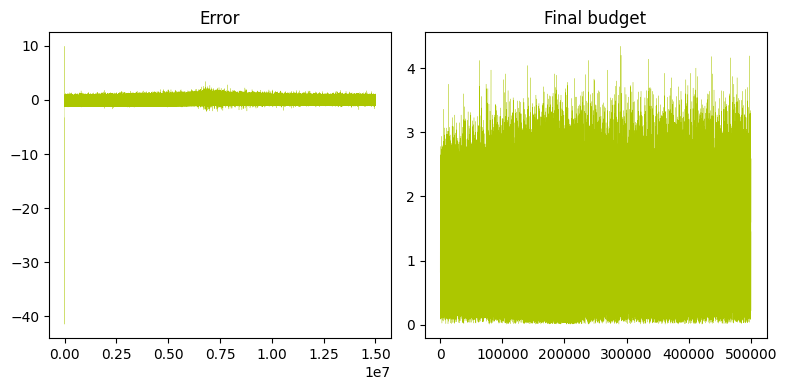

In [9]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
sns.lineplot(x=range(len(training_error)), y=training_error, ax=ax[0], c='#acc700', linewidth=.2)
ax[0].set_title('Error')
sns.lineplot(x=range(len(final_budget_queue)), y=final_budget_queue, ax=ax[1], c='#acc700', linewidth=.2)
ax[1].set_title('Final budget')
plt.tight_layout()
plt.show()

In [148]:
final_budget_queue[-100:-1].mean()

1.5267676767676746

In [22]:
n_episodes_2plus = np.where(np.array(final_budget_queue) > 2)[0].size
print(f'Number of episodes with final budget > 2: {n_episodes_2plus} over 500000')

Number of episodes with final budget > 2: 110139 over 500000


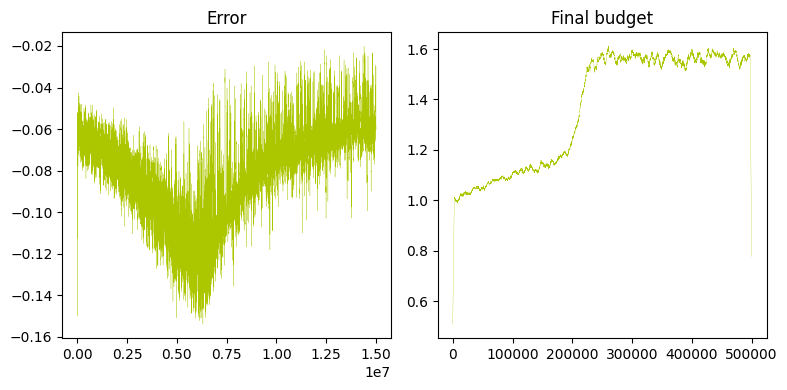

In [143]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
sns.lineplot(x=range(len(error)), y=error, ax=ax[0], c='#acc700', linewidth=.2)
ax[0].set_title('Error')
sns.lineplot(x=range(len(final_budgets)), y=final_budgets, ax=ax[1], c='#acc700', linewidth=.2)
ax[1].set_title('Final budget')
plt.tight_layout()
plt.show()